In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
pd.options.display.max_columns=999
from tqdm import tqdm_notebook
import itertools 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa.api as smt
import numpy as np

In [4]:
df = pd.read_excel('./기존 분석 데이터/지표 최종v2@20211110.xlsx');
df= df.iloc[:,:35]

df.set_index('date',inplace=True)

pop=df.iloc[:,:1]

eco=df.iloc[:,1:13]


future = df.iloc[:,13:16]


income=df.iloc[:,16:17]


now=df.iloc[:,18:22]


pol=df.iloc[:,22]


home_price=df.iloc[:,23:25]


education=df.iloc[:,29:]

df_list = [pop,eco,future,income,now,pol,home_price,education]

In [6]:
df.to_excel('./일자리 세부 지표.xlsx')

In [3]:
display(pop.columns, eco.columns, future.columns, income.columns, now.columns, home_price.columns, education.columns)

NameError: name 'pop' is not defined

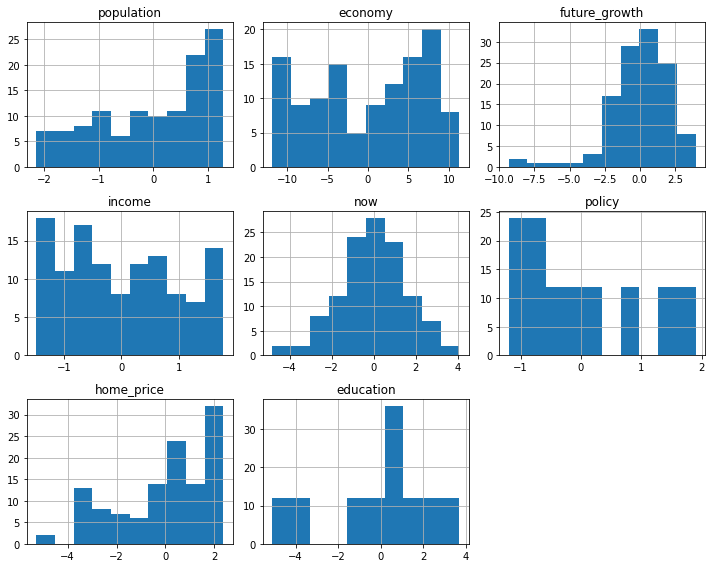

In [142]:
scaled_total_df.hist(figsize=(10,8))
plt.tight_layout()

In [ ]:
df_list = [pop,eco,future,income,now,pol,home_price,education]

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

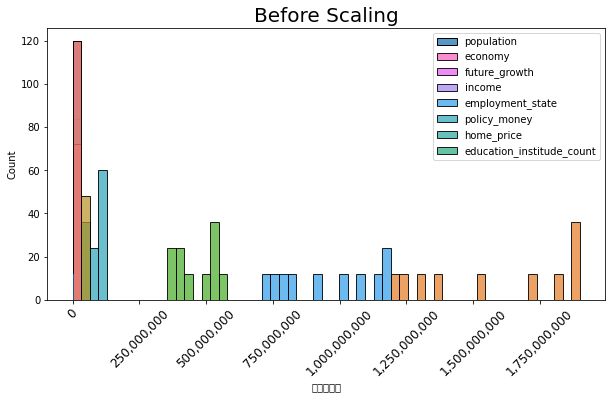

In [200]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ax = plt.subplot()
plt.title('Before Scaling', fontsize=20)

sns.histplot(pop.iloc[1:])
sns.histplot(eco.iloc[1:])
sns.histplot(future.iloc[1:])
sns.histplot(income.iloc[1:])
sns.histplot(now.iloc[1:])
sns.histplot(pol.iloc[1:])
sns.histplot(home_price.iloc[1:])
sns.histplot(education.iloc[1:])
plt.xticks(fontsize =12, rotation=45)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(['population','economy','future_growth','income','employment_state','policy_money','home_price','education_institude_count'], loc='best')


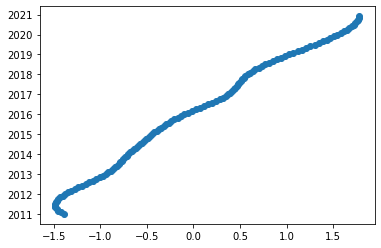

In [216]:
plt.scatter(scaled_total_df['income'].values, y=scaled_total_df['income'].index)

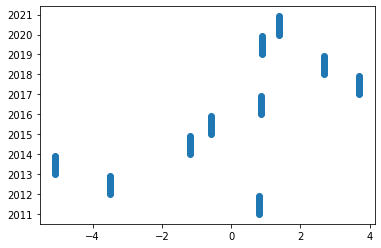

In [215]:
plt.scatter(scaled_total_df['education'].values, y=scaled_total_df['education'].index)

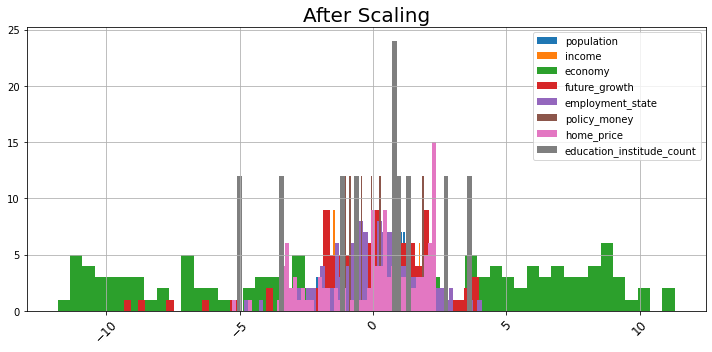

In [201]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
ax = plt.subplot()
plt.title('After Scaling', fontsize=20)


scaled_total_df['population'].hist(bins=50)
scaled_total_df['income'].hist(bins=50)
scaled_total_df['economy'].hist(bins=50)
scaled_total_df['future_growth'].hist(bins=50)
scaled_total_df['now'].hist(bins=50)
scaled_total_df['policy'].hist(bins=50)
scaled_total_df['home_price'].hist(bins=50)
scaled_total_df['education'].hist(bins=50)
# sns.histplot(scaled_total_df['population'])
# sns.histplot(scaled_total_df['income'])
# sns.histplot(scaled_total_df['economy'])
# sns.histplot(scaled_total_df['future_growth'])
# sns.histplot(scaled_total_df['now'])
# sns.histplot(scaled_total_df['policy'])
# sns.histplot(scaled_total_df['home_price'])
# sns.histplot(scaled_total_df['education'])
plt.xticks(fontsize =12, rotation=45)

plt.legend(['population','income','economy','future_growth','employment_state','policy_money','home_price','education_institude_count'], loc='best')
plt.tight_layout()
plt.show()

In [ ]:
display(pop.columns, eco.columns, future.columns, income.columns, now.columns, home_price.columns, education.columns)

<AxesSubplot:xlabel='population', ylabel='Density'>

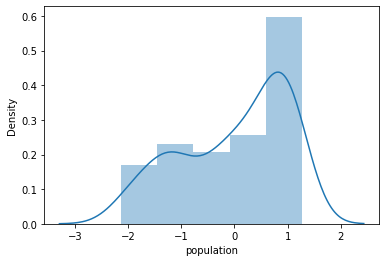

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.distplot(scaled_total_df['population'])

# 지표 정규화

In [3]:
scaler = StandardScaler()
scaled_total_df = pd.DataFrame()

for j,i in enumerate(df_list):

    scaler.fit(pd.DataFrame(df_list[j]).iloc[1:])
    globals()[f'scaled_{j}'] = scaler.transform(pd.DataFrame(df_list[j]).iloc[1:])
    globals()[f'scaled_{j}'] = pd.DataFrame(globals()[f'scaled_{j}']).sum(axis=1)
    
    if j == 0 :
        scaled_total_df = pd.DataFrame(globals()[f'scaled_{j}']).rename(columns={0:'population'})
    else: 
        scaled_total_df = pd.concat([scaled_total_df,globals()[f'scaled_{j}']],axis=1) 

In [4]:
scaled_total_df.columns = ['population','economy','future_growth','income','now','policy','home_price','education']
scaled_total_df.index = df.index[1:]

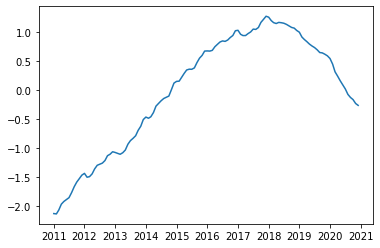

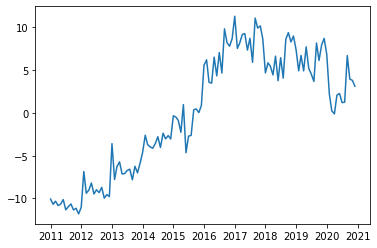

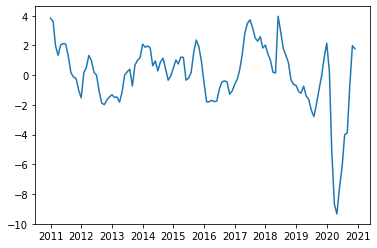

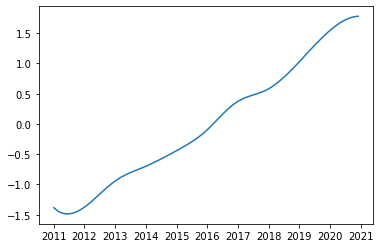

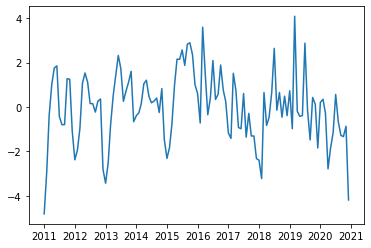

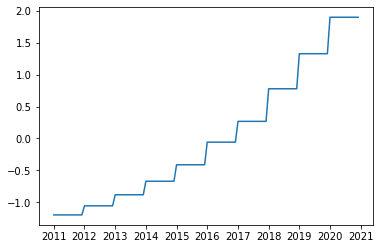

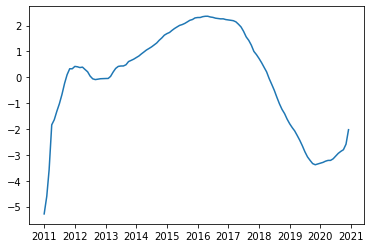

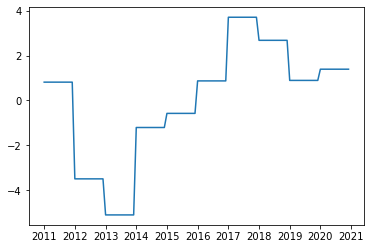

In [5]:
scaled_total_df.index = df.index[1:]
import matplotlib.pyplot as plt
%matplotlib inline
for i in scaled_total_df.columns:
    plt.plot(scaled_total_df[i])
    plt.show()

# 지수 리스트

In [6]:
scaled_total_df

,population,economy,future_growth,income,now,policy,home_price,education
date,,,,,,,,
2011-01-01,-2.132087,-10.077703,3.828191,-1.383847,-4.816288,-1.197743,-5.281970,0.815946
2011-02-01,-2.137988,-10.690432,3.610796,-1.420257,-2.890632,-1.197743,-4.600181,0.815946
2011-03-01,-2.072043,-10.325712,1.983669,-1.448246,-0.399048,-1.197743,-3.571873,0.815946
2011-04-01,-1.969199,-10.836320,1.343084,-1.468311,1.001069,-1.197743,-1.837029,0.815946
2011-05-01,-1.922950,-10.661255,2.030192,-1.480952,1.752488,-1.197743,-1.641268,0.815946
...,...,...,...,...,...,...,...,...
2020-08-01,-0.073135,1.258085,-4.007187,1.739114,-0.657831,1.899605,-2.939561,1.391951
2020-09-01,-0.126741,6.718830,-3.883022,1.754903,-1.276699,1.899605,-2.861930,1.391951
2020-10-01,-0.162722,3.968615,-0.715852,1.767101,-1.334630,1.899605,-2.800051,1.391951


In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
# setting initial values and some bounds for them
ps = range(0, 3)
d=1 
qs = range(0, 3)
Ps = range(0, 3)
D=1 
Qs = range(0, 3)
s = 12 # season length is still 24
from itertools import product 


In [8]:

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

def model(series):
    def optimizeSARIMA(parameters_list, d, D, s):
        """
            Return dataframe with parameters and corresponding AIC

            parameters_list - list with (p, q, P, Q) tuples
            d - integration order in ARIMA model
            D - seasonal integration order 
            s - length of season
        """

        results = []
        best_aic = float("inf")

        for param in tqdm_notebook(parameters_list):
            # we need try-except because on some combinations model fails to converge
            try:
                model=sm.tsa.statespace.SARIMAX(series, order=(param[0], d, param[1]), 
                                                seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
            except:
                continue
            aic = model.aic
            # saving best model, AIC and parameters
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
            results.append([param, model.aic])

        result_table = pd.DataFrame(results)
        result_table.columns = ['parameters', 'aic']
        # sorting in ascending order, the lower AIC is - the better
        result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

        return result_table


    result_table = optimizeSARIMA(parameters_list, d, D, s)

    # set the parameters that give the lowest AIC
    p, q, P, Q = result_table.parameters[0]
    global best_model
    best_model=sm.tsa.statespace.SARIMAX(series, order=(p, d, q), 
                                            seasonal_order=(P, D, Q, s)).fit(disp=-1)
    
    global df_get_result
    df_get_result = best_model.get_forecast(36).summary_frame(alpha=0.10)
    df_get_result2 = best_model.get_forecast(36)
    
    def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
        """
            Plot time series, its ACF and PACF, calculate Dickey–Fuller test

            y - timeseries
            lags - how many lags to include in ACF, PACF calculation
        """
        if not isinstance(y, pd.Series):
            y = pd.Series(y)

        with plt.style.context(style):    
            fig = plt.figure(figsize=figsize)
            layout = (2, 2)
            ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
            acf_ax = plt.subplot2grid(layout, (1, 0))
            pacf_ax = plt.subplot2grid(layout, (1, 1))

            y.plot(ax=ts_ax)
            p_value = sm.tsa.stattools.adfuller(y)[1]
            ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
            smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
            smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()    

    def plotSARIMA(series, model, n_steps):
        """
            Plots model vs predicted values

            series - dataset with timeseries
            model - fitted SARIMA model
            n_steps - number of steps to predict in the future

        """
        # adding model values
        data = series.copy()
        data.columns = ['actual']
        data['arima_model'] = model.fittedvalues
        # making a shift on s+d steps, because these values were unobserved by the model
        # due to the differentiating
        data['arima_model'][:s+d] = np.NaN
        
#         data['ub'] = prediction.conf_int()[:,0]
#         data['lb'] = prediction.conf_int()[:,1]
        # forecasting on n_steps forward 
        forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
        forecast = data.arima_model.append(forecast)
        # calculate error, again having shifted on s+d steps from the beginning
        error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

        plt.title(f'{series.columns[0]}')
        ax = data['actual'].plot(color='r', label="model_forecast_value_before",figsize=(15, 7))


        ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')



        pd.Series(data.actual,index=data.index).plot(ax=ax) 
        pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value_before_after') 



        ax.fill_between(df_get_result2.conf_int().index,
                        pd.Series(df_get_result2.conf_int().iloc[:,0]),
                        pd.Series(df_get_result2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)

        ax.vlines(data.index[-1], series.min(), df_get_result2.conf_int().values.max(), linestyle='--', color='black', label='start of forecast')
        #plt.set_xlabel('Date')
        plt.legend()
        plt.grid(True);
#         ax.fill_between(
#         predict_index,
#         pd.Series(predicted_ub,index=predict_index),
#         pd.Series(predicted_lb,index=predict_index),
#         color='k',
#         alpha=.2
#         )
#         ax.vlines('2019-01-01', 0, 7, linestyle='--', color='red', label='start of forecast')
#         ax.set_xlabel('Date')
#         ax.set_ylabel('growth_stable_index')

        
    
    return plotSARIMA(pd.DataFrame(series), best_model, 46),tsplot(best_model.resid[24+1:], lags=46)

In [19]:
# prediction = model_opt_fit.get_forecast(len(test_data))

# predicted_value = prediction.predicted_mean

# predicted_ub=prediction.conf_int()[:,0]
# predicted_lb=prediction.conf_int()[:,1]
# predict_index= list(test_data.index)
# #r2 = r2_score(test_data, predicted_value)


# # fig, ax = plt.subplots(figsize=(12,6))
# # #data.plot(ax=ax);
# # ax.vlines('2019-01-01', 0, 24, linestyle='--', label='start of forecast')
# # ax.plot(predict_index,predicted_value, color = 'orange', label = 'Prediction') # 예측값(위 vline 이후 구간에 표시됨)
# # ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha= 0.1, label = '0.95 Prediction Interval')
# # ax.legend(loc='best')
# # # plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2,2)})')
# # plt.show()


# # 관측 데이터  1973년 부터 끝까지 
# ax =df_x['population']['2011' : ].plot( label='observed', figsize=(12, 8) )

# # 예측
# pd.Series(predicted_value,index=predict_index).plot(
#     ax=ax,
#     label='One-step ahead Forecast',
#     alpha=.7
# )

# ax.fill_between(
#     predict_index,
#     pd.Series(predicted_ub,index=predict_index),
#     pd.Series(predicted_lb,index=predict_index),
#     color='k',
#     alpha=.2
# )
# ax.vlines('2019-01-01', 0, 7, linestyle='--', color='red', label='start of forecast')
# ax.set_xlabel('Date')
# ax.set_ylabel('growth_stable_index')
# plt.legend(loc='best')


# plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
scaled_total_df.columns

Index(['population', 'economy', 'future_growth', 'income', 'now', 'policy',
       'home_price', 'education'],
      dtype='object')

In [24]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           population   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 226.648
Date:                              Mon, 13 Dec 2021   AIC                           -443.296
Time:                                      12:46:39   BIC                           -429.932
Sample:                                  01-01-2011   HQIC                          -437.879
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      7.801      0.128      0.898     -14.289      16.289
ma.L1         -0.5140      0.115     -4.472      0.000      -0.739      -0.289
ma.L2         -0.2262      0.131     -1.722      0.085      -0.484       0.031
ma.S.L12      -1.0000    780.070     -0.001      0.999   -1529.910    1527.910
sigma2         0.0007      0.513      0.001      0.999      -1.005       1.006
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.81   Prob(JB):                         0.11
Heteroskedasticity (H):               0.61   Skew:                             0.44
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           population   No. Observations:                  120
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 226.648
Date:                              Mon, 13 Dec 2021   AIC                           -443.296
Time:                                      13:28:49   BIC                           -429.932
Sample:                                  01-01-2011   HQIC                          -437.879
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      7.801      0.128      0.898     -14.289      16.289
ma.L1         -0.5140      0.115     -4.472      0.000      -0.739      -0.289
ma.L2         -0.2262      0.131     -1.722      0.085      -0.484       0.031
ma.S.L12      -1.0000    780.070     -0.001      0.999   -1529.910    1527.910
sigma2         0.0007      0.513      0.001      0.999      -1.005       1.006
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.81   Prob(JB):                         0.11
Heteroskedasticity (H):               0.61   Skew:                             0.44
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            economy   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -214.513
Date:                            Mon, 13 Dec 2021   AIC                            435.025
Time:                                    13:29:38   BIC                            443.044
Sample:                                01-01-2011   HQIC                           438.276
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4824      0.091     -5.281      0.000      -0.661      -0.303
ma.S.L12      -0.5205      0.112     -4.662      0.000      -0.739      -0.302
sigma2         3.1074      0.268     11.606      0.000       2.583       3.632
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                71.86
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.99
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      future_growth   No. Observations:                  120
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -158.350
Date:                            Mon, 13 Dec 2021   AIC                            326.700
Time:                                    13:30:27   BIC                            340.064
Sample:                                01-01-2011   HQIC                           332.118
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2890      0.080     16.143      0.000       1.133       1.446
ar.L2         -0.5410      0.074     -7.338      0.000      -0.686      -0.397
ma.L1         -0.8867      0.055    -16.156      0.000      -0.994      -0.779
ma.S.L12      -0.8635      0.260     -3.323      0.001      -1.373      -0.354
sigma2         0.9636      0.184      5.240      0.000       0.603       1.324
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                56.37
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              income   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 12)   Log Likelihood                 722.584
Date:                             Mon, 13 Dec 2021   AIC                          -1433.169
Time:                                     13:31:58   BIC                          -1417.132
Sample:                                 01-01-2011   HQIC                         -1426.668
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9350      0.012    168.084      0.000       1.912       1.958
ar.L2         -0.9602      0.011    -90.403      0.000      -0.981      -0.939
ma.L1          1.2893      0.063     20.407      0.000       1.165       1.413
ma.L2          0.9476      0.085     11.151      0.000       0.781       1.114
ar.S.L12      -0.3675      0.168     -2.190      0.029      -0.696      -0.039
sigma2      7.593e-08   1.84e-08      4.135      0.000    3.99e-08    1.12e-07
===================================================================================
Ljung-Box (L1) (Q):                   1.66   Jarque-Bera (JB):                10.30
Prob(Q):                              0.20   Prob(JB):                         0.01
Heteroskedasticity (H):               0.66   Skew:                             0.58
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                     now   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -162.095
Date:                                 Mon, 13 Dec 2021   AIC                            336.190
Time:                                         13:32:38   BIC                            352.227
Sample:                                     01-01-2011   HQIC                           342.691
                                          - 12-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4443      0.088     -5.034      0.000      -0.617      -0.271
ar.S.L12      -1.2252      0.261     -4.686      0.000      -1.738      -0.713
ar.S.L24      -0.7827      0.199     -3.929      0.000      -1.173      -0.392
ma.S.L12       0.8608      0.355      2.428      0.015       0.166       1.556
ma.S.L24       0.4186      0.305      1.374      0.169      -0.179       1.016
sigma2         1.1193      0.156      7.180      0.000       0.814       1.425
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                18.77
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.81
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  policy   No. Observations:                  120
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                 288.849
Date:                                 Mon, 13 Dec 2021   AIC                           -569.698
Time:                                         13:34:06   BIC                           -559.007
Sample:                                     01-01-2011   HQIC                          -565.364
                                          - 12-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8523      0.087      9.782      0.000       0.682       1.023
ma.S.L12      -1.3134      2.509     -0.523      0.601      -6.231       3.605
ma.S.L24       0.9870      3.680      0.268      0.789      -6.227       8.201
sigma2         0.0002      0.001      0.271      0.786      -0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3767.03
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               9.17   Skew:                             3.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          home_price   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  46.759
Date:                             Mon, 13 Dec 2021   AIC                            -87.518
Time:                                     13:35:34   BIC                            -79.499
Sample:                                 01-01-2011   HQIC                           -84.267
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9852      0.011     91.730      0.000       0.964       1.006
ma.L1         -0.4915      0.057     -8.569      0.000      -0.604      -0.379
sigma2         0.0239      0.001     17.227      0.000       0.021       0.027
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):              2247.30
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

  0%|          | 0/81 [00:00<?, ?it/s]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            education   No. Observations:                  120
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                 -97.214
Date:                              Mon, 13 Dec 2021   AIC                            202.429
Time:                                      13:36:35   BIC                            213.120
Sample:                                  01-01-2011   HQIC                           206.763
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7942      0.019    -41.885      0.000      -0.831      -0.757
ar.S.L24      -0.8151      0.014    -57.495      0.000      -0.843      -0.787
ma.S.L12       0.9939      3.500      0.284      0.776      -5.866       7.854
sigma2         0.2176      0.752      0.289      0.772      -1.256       1.691
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3037.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

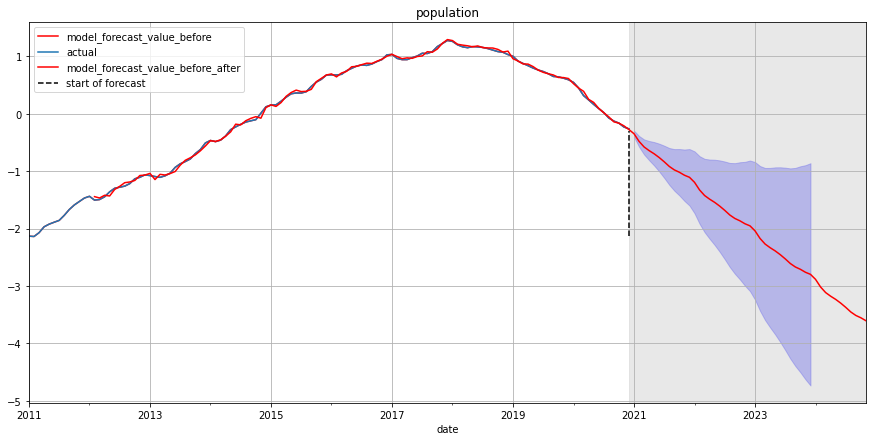

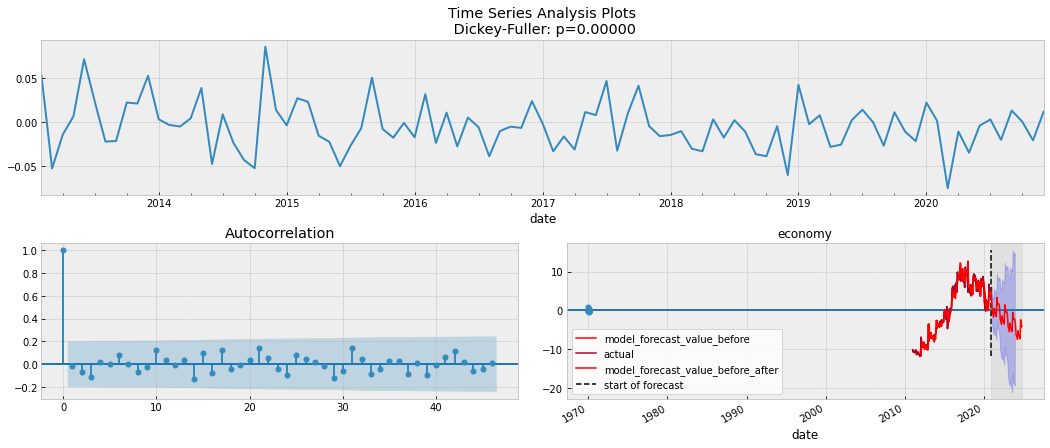

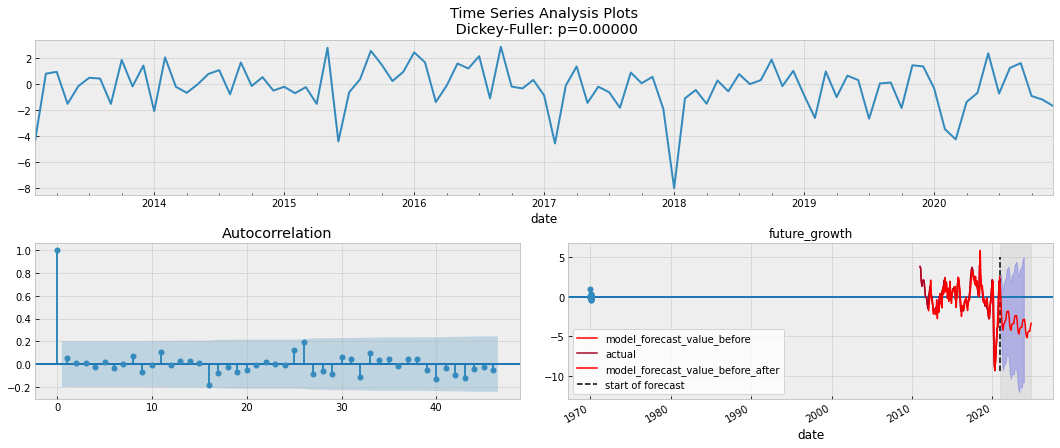

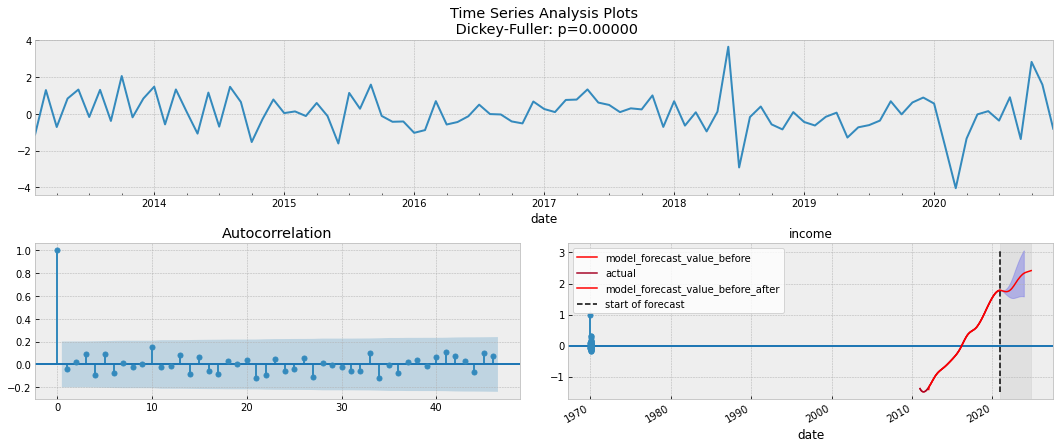

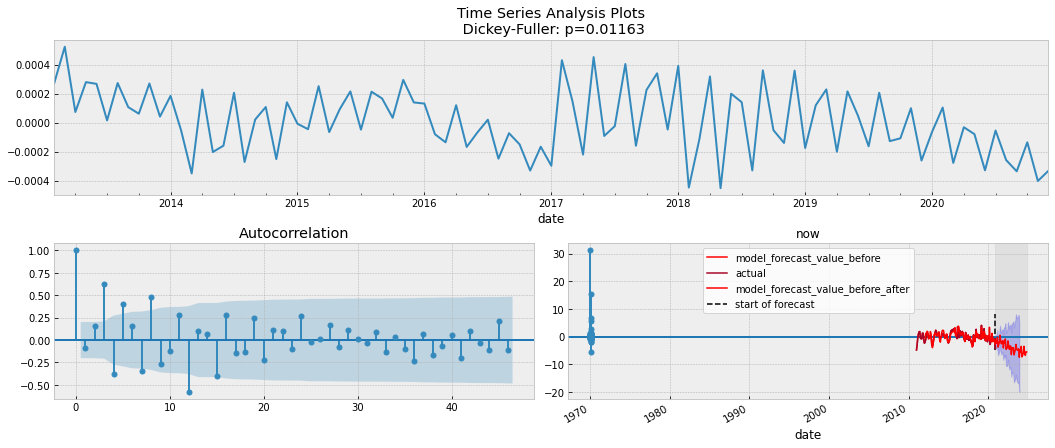

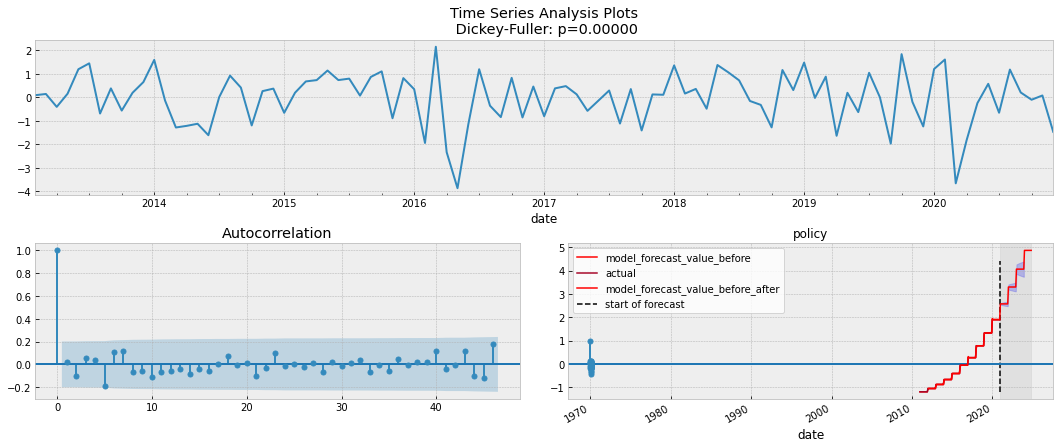

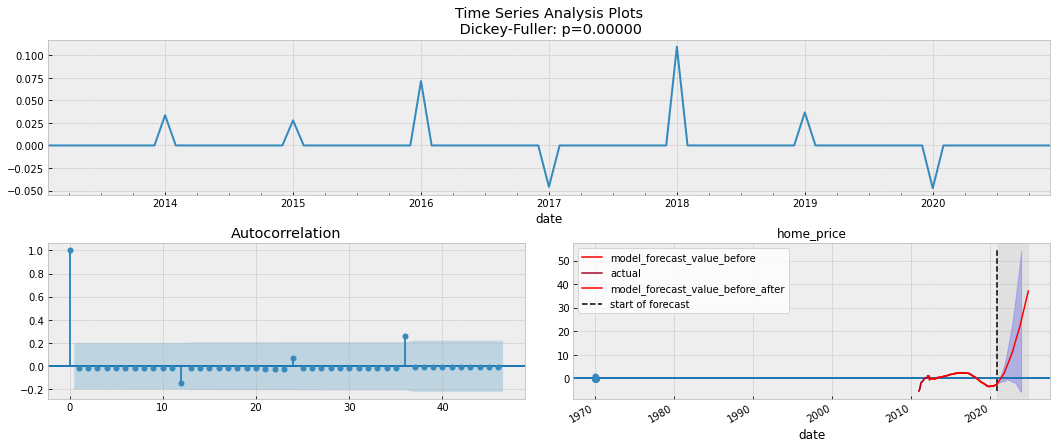

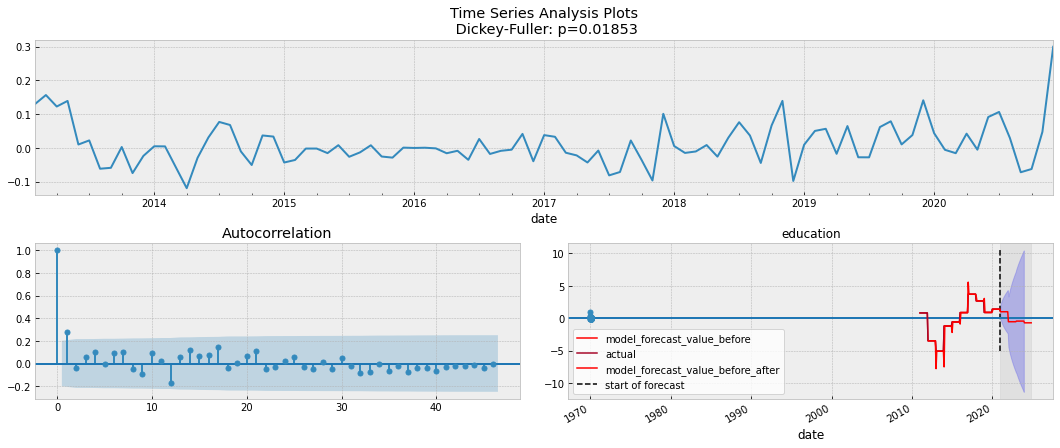

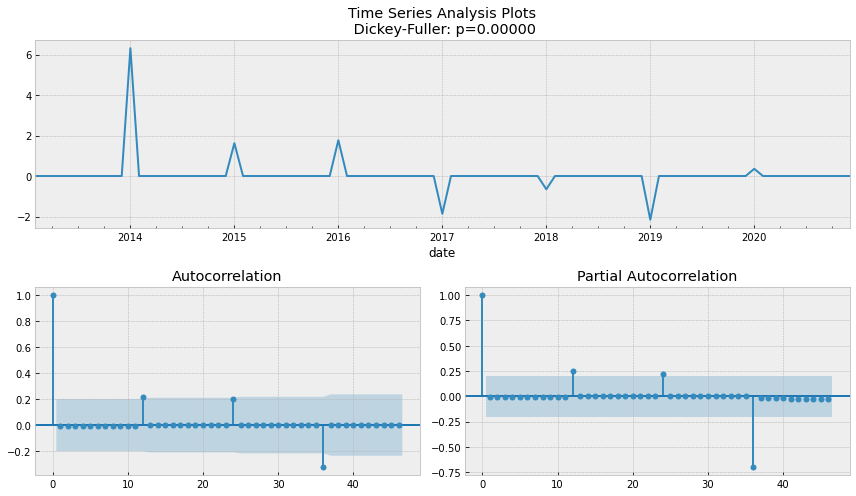

In [33]:
for j,i in enumerate(scaled_total_df.columns):
    model(scaled_total_df[i])
    globals()[f'df_forecast_{j}'] = df_get_result.add_suffix(f'_{i}')
    display(best_model.summary())
    

In [ ]:
# for j,i in enumerate(scaled_total_df.columns):
#     index_forecast(scaled_total_df[i])
#     display(tsplot(best_model.resid[24+1:], lags=45))
    
#     globals()[f'df_forecast_{j}'] = df_get_result.add_suffix(f'_{i}')
    


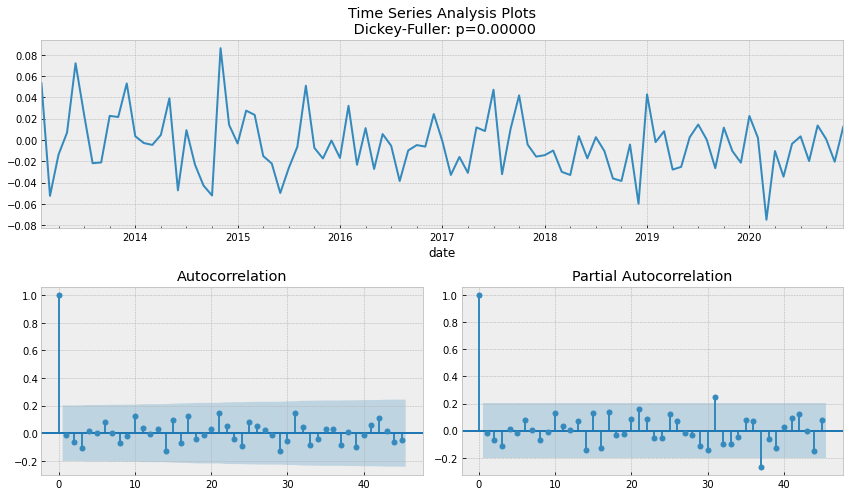

In [29]:
# #p, q, P, Q = result_table.parameters[0]

# best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['population'], order=(1, 1, 2), 
#                                         seasonal_order=(0, 1, 1, 12)).fit(disp=-1)

# df_get_result_hp = best_model.get_forecast(36).summary_frame(alpha=0.10)
# df_get_result_hp2 = best_model.get_forecast(36)
# def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
#     """
#         Plot time series, its ACF and PACF, calculate Dickey–Fuller test

#         y - timeseries
#         lags - how many lags to include in ACF, PACF calculation
#     """
#     if not isinstance(y, pd.Series):
#         y = pd.Series(y)

#     with plt.style.context(style):    
#         fig = plt.figure(figsize=figsize)
#         layout = (2, 2)
#         ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
#         acf_ax = plt.subplot2grid(layout, (1, 0))
#         pacf_ax = plt.subplot2grid(layout, (1, 1))

#         y.plot(ax=ts_ax)
#         p_value = sm.tsa.stattools.adfuller(y)[1]
#         ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
#         smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
#         smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
#         plt.tight_layout()

# import statsmodels.tsa.api as smt
# tsplot(best_model.resid[24+1:], lags=45)

# def plotSARIMA(series, model, n_steps):
#     """
#         Plots model vs predicted values

#         series - dataset with timeseries
#         model - fitted SARIMA model
#         n_steps - number of steps to predict in the future

#     """
#     # adding model values
#     data = series.copy()
#     data.columns = ['actual']
#     data['arima_model'] = model.fittedvalues
#     # making a shift on s+d steps, because these values were unobserved by the model
#     # due to the differentiating
#     data['arima_model'][:s+d] = np.NaN


    
#     global forecast
#     # forecasting on n_steps forward 
#     forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
#     forecast = data.arima_model.append(forecast)
#     #forecast_df = pd.DataFrame(forecast).rename(columns = {0:'forecast_value'},inplace=True)

# #     forecast_df['predicted_ub'] =df_get_result_hp2.conf_int().iloc[:,0]
# #     forecast_df['predicted_lb'] =df_get_result_hp2.conf_int().iloc[:,1]
#     # calculate error, again having shifted on s+d steps from the beginning

#     error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    

    

#     plt.title('population')
#     ax = data['actual'].plot(color='r', label="model_forecast_value_before",figsize=(15, 7))
    
    
#     ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


#     pd.Series(data.actual,index=data.index).plot(ax=ax) 
#     pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value_after') 


    
#     ax.fill_between(df_get_result_hp2.conf_int().index,
#                     pd.Series(df_get_result_hp2.conf_int().iloc[:,0]),
#                     pd.Series(df_get_result_hp2.conf_int().iloc[:,1]),
#         color='b',
#         alpha=.4)
    
#     ax.vlines(data.index[-1], df_get_result_hp2.conf_int().values.min(), data['actual'].values.max(), linestyle='--', color='black', label='start of forecast')
#     #plt.set_xlabel('Date')
#     plt.legend()
#     plt.grid(True);

    
#     # 관측 데이터  1973년 부터 끝까지 
#     #ax =df_x['population']['2011' : ].plot( label='observed', figsize=(12, 8) )

#     # 예측
# #     pd.Series(predicted_value,index=predict_index).plot(
# #         plt=plt,
# #         label='One-step ahead Forecast',
# #         alpha=.7
    

    





# def mean_absolute_percentage_error(y_true, y_pred): 
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [ ]:
now SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)	 d 
policy	 SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)	 d
home_price SARIMAX(1, 1, 1)x(0, 1, [], 12) ㅇ
education SARIMAX(0, 1, 0)x(2, 1, [1], 12)

# 일자리 예산 지수 재적합

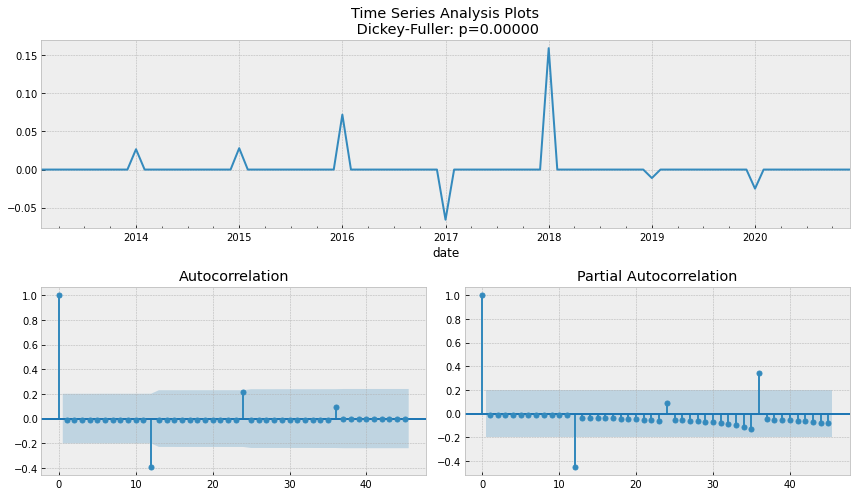

In [55]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['policy'], order=(0, 1, 0), 
                                        seasonal_order=(1, 1, 1, 12)).fit(disp=-1)

df_get_result_pol = best_model.get_forecast(36).summary_frame(alpha=0.10)
df_get_result_pol2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN


    
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    #forecast_df = pd.DataFrame(forecast).rename(columns = {0:'forecast_value'},inplace=True)

#     forecast_df['predicted_ub'] =df_get_result_hp2.conf_int().iloc[:,0]
#     forecast_df['predicted_lb'] =df_get_result_hp2.conf_int().iloc[:,1]
    # calculate error, again having shifted on s+d steps from the beginning

    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    

    

    plt.title('policy_money')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value') 


    
    ax.fill_between(df_get_result_pol2.conf_int().index,
                    pd.Series(df_get_result_pol2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_pol2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], scaled_total_df['policy'].min(), df_get_result_pol2.conf_int().values.max(), linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    plt.legend()
    plt.grid(True);

    
    # 관측 데이터  1973년 부터 끝까지 
    #ax =df_x['population']['2011' : ].plot( label='observed', figsize=(12, 8) )

    # 예측
#     pd.Series(predicted_value,index=predict_index).plot(
#         plt=plt,
#         label='One-step ahead Forecast',
#         alpha=.7
    

    





def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [56]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               policy   No. Observations:                  120
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 270.730
Date:                              Wed, 15 Dec 2021   AIC                           -535.459
Time:                                      09:08:59   BIC                           -527.441
Sample:                                  01-01-2011   HQIC                          -532.209
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9812      0.150      6.525      0.000       0.686       1.276
ma.S.L12      -0.8596      0.550     -1.564      0.118      -1.937       0.217
sigma2         0.0003      0.000      2.532      0.011    7.37e-05       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10951.53
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              12.65   Skew:                             5.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

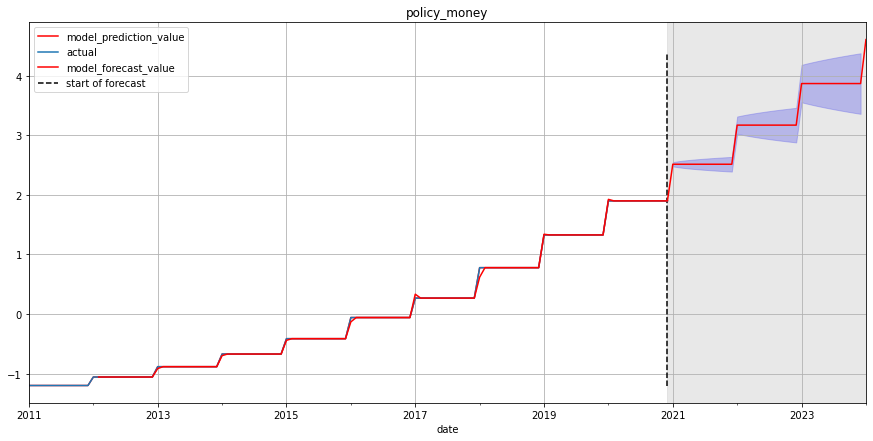

In [57]:
plotSARIMA(pd.DataFrame(scaled_total_df['policy']), best_model, 36)

# 집값 재적합

In [ ]:
    ((2, 1, 2), (1, 0, 0, 12)), # home_price# Best model:  ARIMA(0,2,1)(0,0,0)[0] home_price

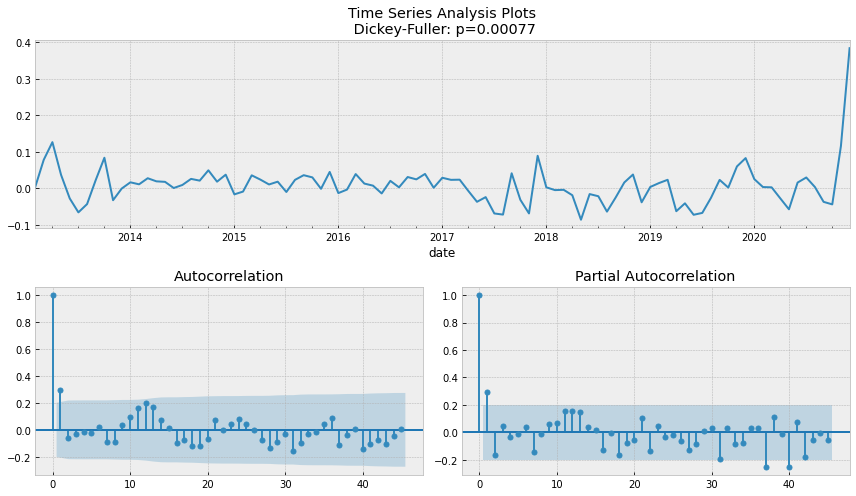

In [41]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['home_price'], order=(2, 0, 2), 
                                        seasonal_order=(0, 0, 0, 12)).fit(disp=-1)

df_get_result_hp = best_model.get_forecast(36).summary_frame(alpha=0.10)
df_get_result_hp2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN


    
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    #forecast_df = pd.DataFrame(forecast).rename(columns = {0:'forecast_value'},inplace=True)

#     forecast_df['predicted_ub'] =df_get_result_hp2.conf_int().iloc[:,0]
#     forecast_df['predicted_lb'] =df_get_result_hp2.conf_int().iloc[:,1]
    # calculate error, again having shifted on s+d steps from the beginning

    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    

    

    plt.title('Home_Price')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value') 


    
    ax.fill_between(df_get_result_hp2.conf_int().index,
                    pd.Series(df_get_result_hp2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_hp2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], scaled_total_df['home_price'].min(), df_get_result_hp2.conf_int().values.max(), linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    plt.legend()
    plt.grid(True);

    
    # 관측 데이터  1973년 부터 끝까지 
    #ax =df_x['population']['2011' : ].plot( label='observed', figsize=(12, 8) )

    # 예측
#     pd.Series(predicted_value,index=predict_index).plot(
#         plt=plt,
#         label='One-step ahead Forecast',
#         alpha=.7
    

    





def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [43]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             home_price   No. Observations:                  120
Model:               SARIMAX(2, 0, 2)   Log Likelihood                  50.254
Date:                Wed, 15 Dec 2021   AIC                            -90.508
Time:                        08:58:45   BIC                            -76.570
Sample:                    01-01-2011   HQIC                           -84.848
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9717      0.023     85.439      0.000       1.926       2.017
ar.L2         -0.9767      0.017    -56.765      0.000      -1.010      -0.943
ma.L1         -0.4258      0.064     -6.650      0.000      -0.551      -0.300
ma.L2         -0.1078      0.072     -1.504      0.133      -0.248       0.033
sigma2         0.0236      0.001     16.813      0.000       0.021       0.026
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4261.70
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

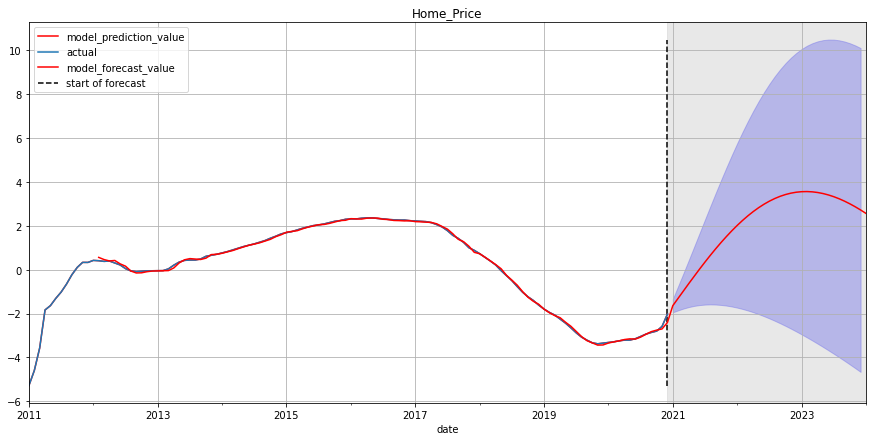

In [42]:
plotSARIMA(pd.DataFrame(scaled_total_df['home_price']), best_model, 36)

In [ ]:
인구 SARIMAX(1, 1, 2)x(0, 1, [1], 12)
경제 SARIMAX(0, 1, 1)x(0, 1, 1, 12) 
future_growth SARIMAX(2, 1, 1)x(0, 1, 1, 12)	
income 	SARIMAX(2, 1, 2)x(1, 1, [], 12)
now SARIMAX(0, 1, 1)x(2, 1, [1, 2], 12)	
policy	 SARIMAX(0, 1, 0)x(1, 1, [1, 2], 12)	
home_price SARIMAX(1, 1, 1)x(0, 1, [], 12)
education SARIMAX(0, 1, 0)x(2, 1, [1], 12)

# 소득 지수 재적합

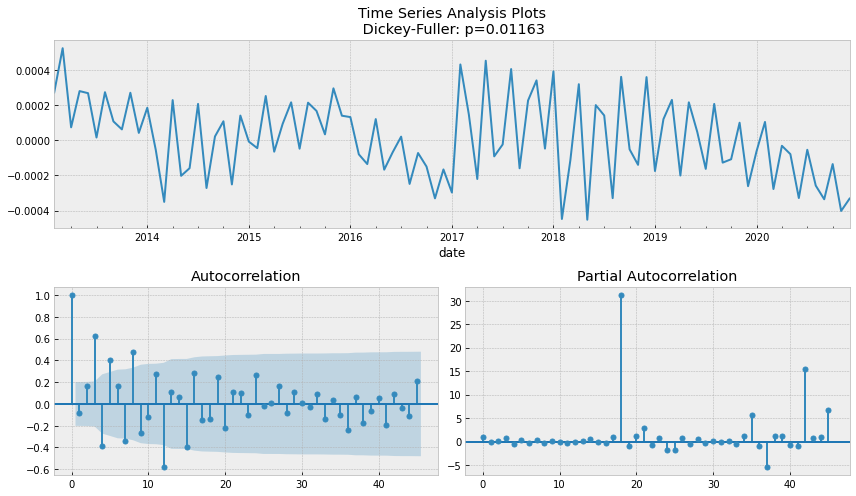

In [46]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['income'], order=(2, 1, 2), 
                                        seasonal_order=(1, 1, 0, 12)).fit(disp=-1)

df_get_result_in = best_model.get_forecast(36).summary_frame(alpha=0.30)
df_get_result_in2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.title('income')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='forecast_value') 


    
    ax.fill_between(df_get_result_in2.conf_int().index,
                    pd.Series(df_get_result_in2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_in2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], scaled_total_df['income'].min(), 3, linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    plt.legend()
    plt.grid(True);

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [48]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              income   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 12)   Log Likelihood                 722.584
Date:                             Wed, 15 Dec 2021   AIC                          -1433.169
Time:                                     09:02:35   BIC                          -1417.132
Sample:                                 01-01-2011   HQIC                         -1426.668
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9350      0.012    168.084      0.000       1.912       1.958
ar.L2         -0.9602      0.011    -90.403      0.000      -0.981      -0.939
ma.L1          1.2893      0.063     20.407      0.000       1.165       1.413
ma.L2          0.9476      0.085     11.151      0.000       0.781       1.114
ar.S.L12      -0.3675      0.168     -2.190      0.029      -0.696      -0.039
sigma2      7.593e-08   1.84e-08      4.135      0.000    3.99e-08    1.12e-07
===================================================================================
Ljung-Box (L1) (Q):                   1.66   Jarque-Bera (JB):                10.30
Prob(Q):                              0.20   Prob(JB):                         0.01
Heteroskedasticity (H):               0.66   Skew:                             0.58
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

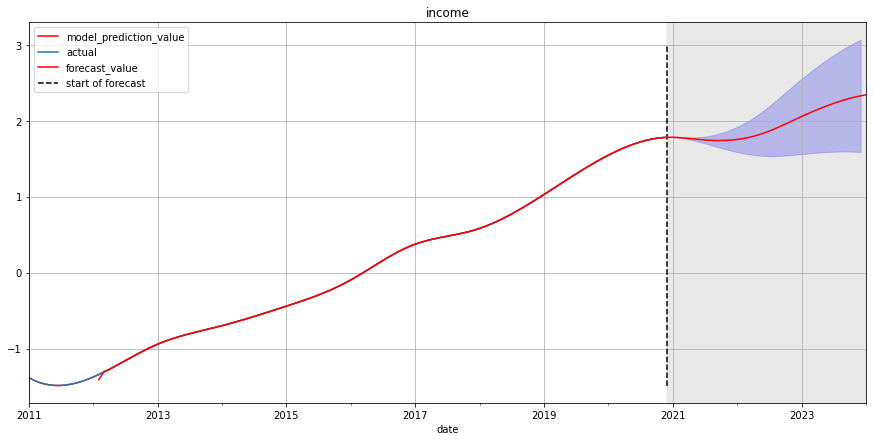

In [47]:
plotSARIMA(pd.DataFrame(scaled_total_df['income']), best_model, 36)

# 경제 성장 재적합

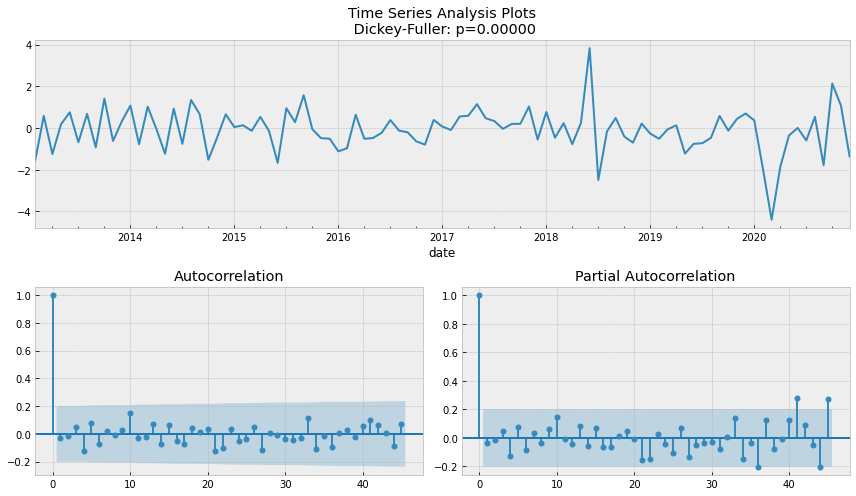

In [38]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['future_growth'], order=(2, 0, 0), 
                                        seasonal_order=(0, 1, 1, 12)).fit(disp=-1)

df_get_result_fg = best_model.get_forecast(36).summary_frame(alpha=0.30)
df_get_result_fg2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.title('future_growth')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='forecast_value') 


    
    ax.fill_between(df_get_result_fg2.conf_int().index,
                    pd.Series(df_get_result_fg2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_fg2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], scaled_total_df['future_growth'].min(), scaled_total_df['future_growth'].max(), linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    plt.legend()
    plt.grid(True);

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [40]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        future_growth   No. Observations:                  120
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -158.878
Date:                              Wed, 15 Dec 2021   AIC                            325.756
Time:                                      08:54:58   BIC                            336.485
Sample:                                  01-01-2011   HQIC                           330.106
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3367      0.059     22.787      0.000       1.222       1.452
ar.L2         -0.5074      0.062     -8.167      0.000      -0.629      -0.386
ma.S.L12      -0.8856      0.281     -3.147      0.002      -1.437      -0.334
sigma2         0.9269      0.183      5.075      0.000       0.569       1.285
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                91.71
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.82   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

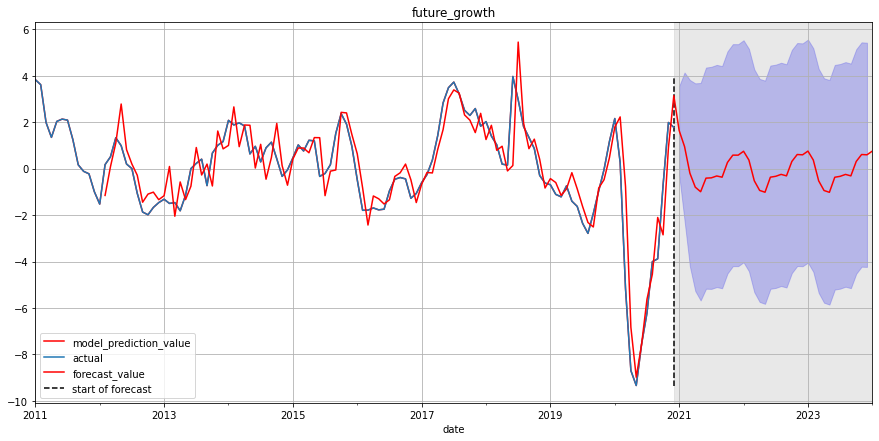

In [39]:
plotSARIMA(pd.DataFrame(scaled_total_df['future_growth']), best_model, 36)

# 인구 재적합

In [ ]:
SARIMAX(1, 1, 2)x(0, 1, [1], 12)	

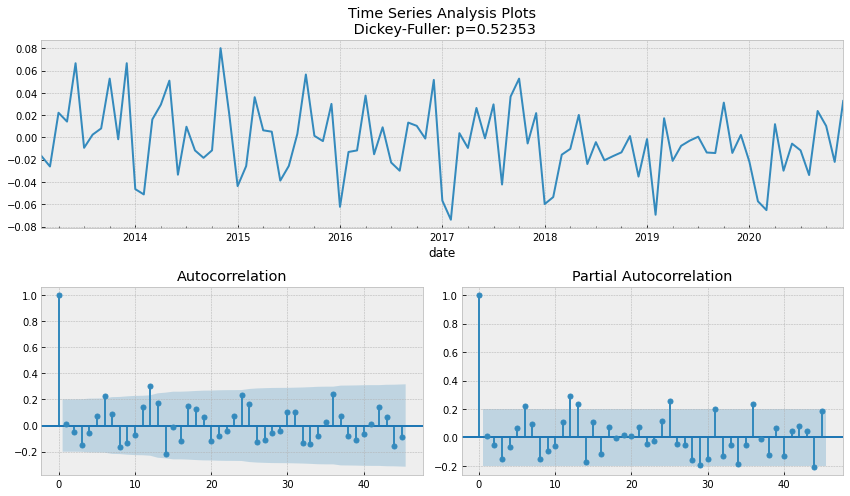

In [23]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['population'], order=(2, 1, 2), 
                                        seasonal_order=(0, 0, 0, 12)).fit(disp=-1)

df_get_result_pop = best_model.get_forecast(36).summary_frame(alpha=0.30)
df_get_result_pop2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    #error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    #plt.title('population')
    plt.title(f'{series.columns[0]}')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))


    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')



    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value') 



    ax.fill_between(df_get_result_pop2.conf_int().index,
                    pd.Series(df_get_result_pop2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_pop2.conf_int().iloc[:,1]),
    color='b',
    alpha=.4)

    ax.vlines(data.index[-1], -3, 2, linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    plt.legend()

    plt.grid(True);

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [33]:
df_get_result_pop2.predicted_mean

2021-01-01   -0.297620
2021-02-01   -0.343498
2021-03-01   -0.390841
2021-04-01   -0.437971
2021-05-01   -0.484603
2021-06-01   -0.530692
2021-07-01   -0.576235
2021-08-01   -0.621239
2021-09-01   -0.665709
2021-10-01   -0.709651
2021-11-01   -0.753072
2021-12-01   -0.795978
2022-01-01   -0.838374
2022-02-01   -0.880268
2022-03-01   -0.921665
2022-04-01   -0.962570
2022-05-01   -1.002990
2022-06-01   -1.042931
2022-07-01   -1.082397
2022-08-01   -1.121396
2022-09-01   -1.159931
2022-10-01   -1.198010
2022-11-01   -1.235636
2022-12-01   -1.272817
2023-01-01   -1.309556
2023-02-01   -1.345859
2023-03-01   -1.381732
2023-04-01   -1.417179
2023-05-01   -1.452205
2023-06-01   -1.486816
2023-07-01   -1.521016
2023-08-01   -1.554810
2023-09-01   -1.588204
2023-10-01   -1.621201
2023-11-01   -1.653807
2023-12-01   -1.686026
Freq: MS, Name: predicted_mean, dtype: float64

In [24]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             population   No. Observations:                  120
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 235.409
Date:                Wed, 15 Dec 2021   AIC                           -460.818
Time:                        08:46:31   BIC                           -446.923
Sample:                    01-01-2011   HQIC                          -455.176
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1615      0.265      4.386      0.000       0.642       1.681
ar.L2         -0.1713      0.259     -0.662      0.508      -0.678       0.336
ma.L1         -0.4926      0.241     -2.040      0.041      -0.966      -0.019
ma.L2         -0.3405      0.164     -2.074      0.038      -0.662      -0.019
sigma2         0.0011      0.000      7.637      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.82   Prob(JB):                         0.91
Heteroskedasticity (H):               0.61   Skew:                            -0.07
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

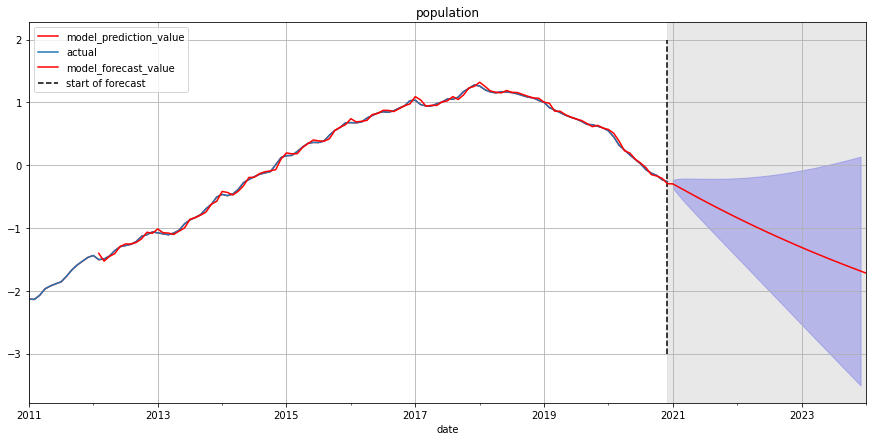

In [25]:
plotSARIMA(pd.DataFrame(scaled_total_df['population']), best_model, 36)

# 고용현황

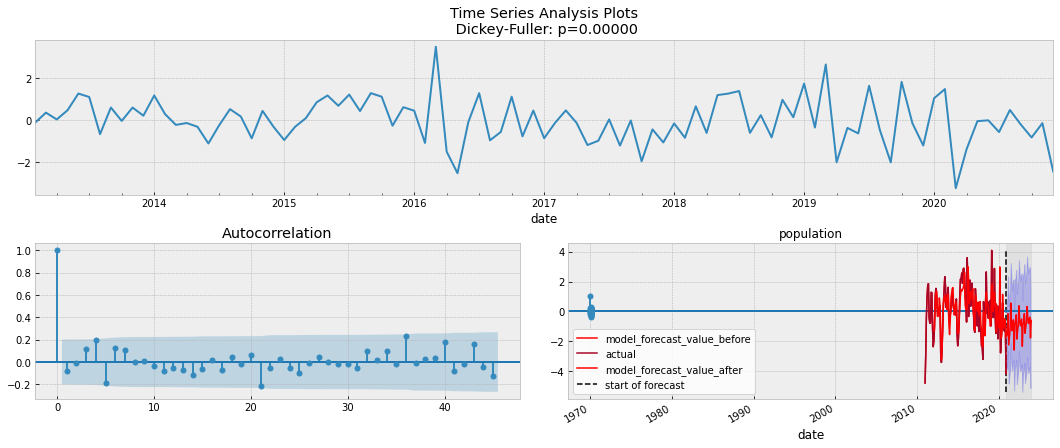

In [49]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['now'], order=(2, 0, 1), 
                                        seasonal_order=(2, 0, 0, 12)).fit(disp=-1)

df_get_result_now = best_model.get_forecast(36).summary_frame(alpha=0.30)
df_get_result_now2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])


    plt.title('population')
    ax = data['actual'].plot(color='r', label="model_forecast_value_before",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value_after') 


    
    ax.fill_between(df_get_result_now2.conf_int().index,
                    pd.Series(df_get_result_now2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_now2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], df_get_result_now2.conf_int().values.min(), data['actual'].values.max(), linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    
    plt.legend()
    plt.grid(True);

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [51]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 now   No. Observations:                  120
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 12)   Log Likelihood                -182.239
Date:                             Wed, 15 Dec 2021   AIC                            376.478
Time:                                     09:06:12   BIC                            393.203
Sample:                                 01-01-2011   HQIC                           383.271
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9822      0.509      1.929      0.054      -0.016       1.980
ar.L2         -0.1413      0.349     -0.404      0.686      -0.826       0.544
ma.L1         -0.4467      0.502     -0.890      0.373      -1.430       0.537
ar.S.L12       0.4641      0.106      4.395      0.000       0.257       0.671
ar.S.L24       0.2685      0.142      1.896      0.058      -0.009       0.546
sigma2         1.1362      0.136      8.356      0.000       0.870       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.97
Prob(Q):                              0.81   Prob(JB):                         0.14
Heteroskedasticity (H):               2.12   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

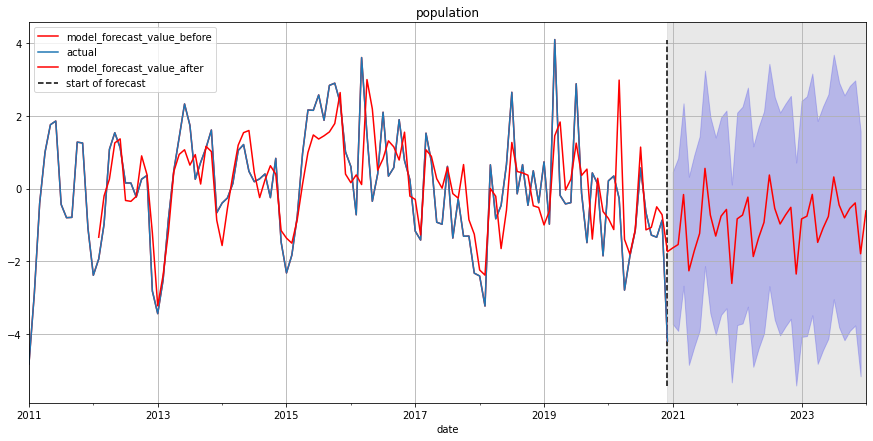

In [50]:
plotSARIMA(pd.DataFrame(scaled_total_df['now']), best_model, 36)

# 교육환경지수 

In [ ]:
education SARIMAX(0, 1, 0)x(2, 1, [1], 12)

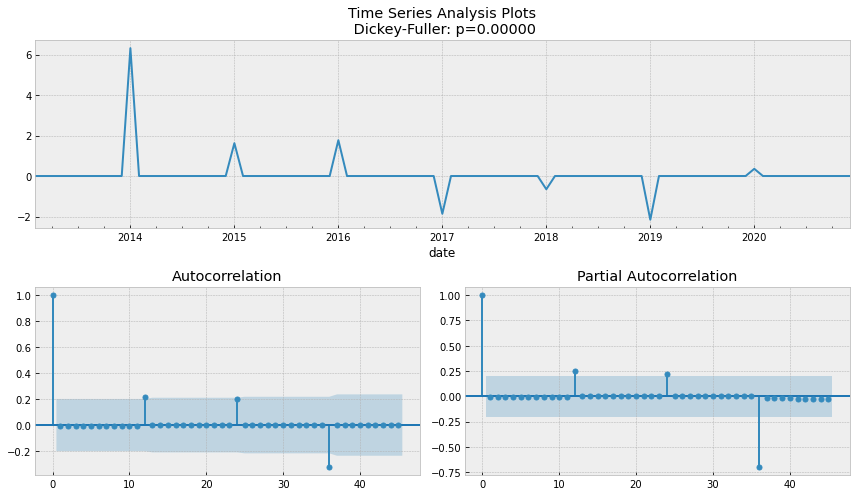

In [61]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['education'], order=(0, 1, 0), 
                                        seasonal_order=(2, 1, 1, 12)).fit(disp=-1)

df_get_result_ed = best_model.get_forecast(36).summary_frame(alpha=0.30)
df_get_result_ed2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    plt.title('education')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value') 


    
    ax.fill_between(df_get_result_ed2.conf_int().index,
                    pd.Series(df_get_result_ed2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_ed2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], df_get_result_ed2.conf_int().values.min(), data['actual'].values.max(), linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [63]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            education   No. Observations:                  120
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                 -97.214
Date:                              Wed, 15 Dec 2021   AIC                            202.429
Time:                                      09:15:09   BIC                            213.120
Sample:                                  01-01-2011   HQIC                           206.763
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7942      0.019    -41.885      0.000      -0.831      -0.757
ar.S.L24      -0.8151      0.014    -57.495      0.000      -0.843      -0.787
ma.S.L12       0.9939      3.500      0.284      0.776      -5.866       7.854
sigma2         0.2176      0.752      0.289      0.772      -1.256       1.691
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3037.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

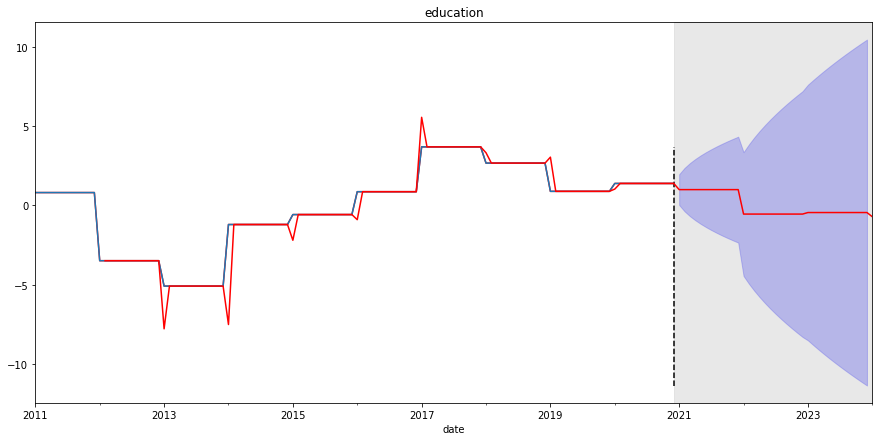

In [62]:
plotSARIMA(pd.DataFrame(scaled_total_df['education']), best_model, 36)

# 경제 재적합

In [ ]:
SARIMAX(0, 1, 1)x(0, 1, 1, 12)

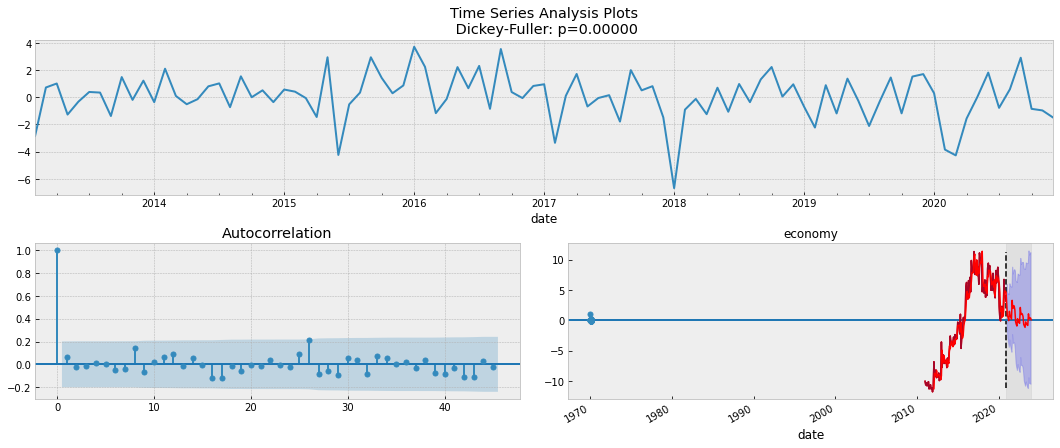

In [58]:
#p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(scaled_total_df['economy'], order=(2, 0, 1), 
                                        seasonal_order=(2, 0, 1, 12)).fit(disp=-1)

df_get_result_eco = best_model.get_forecast(36).summary_frame(alpha=0.30)
df_get_result_eco2 = best_model.get_forecast(36)
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

import statsmodels.tsa.api as smt
tsplot(best_model.resid[24+1:], lags=45)

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values

        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future

    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    global forecast
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])
    plt.title('economy')
    ax = data['actual'].plot(color='r', label="model_prediction_value",figsize=(15, 7))
    
    
    ax.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    


    pd.Series(data.actual,index=data.index).plot(ax=ax) 
    pd.Series(forecast, index=forecast.index).plot(ax=ax,color='red', label='model_forecast_value') 


    
    ax.fill_between(df_get_result_eco2.conf_int().index,
                    pd.Series(df_get_result_eco2.conf_int().iloc[:,0]),
                    pd.Series(df_get_result_eco2.conf_int().iloc[:,1]),
        color='b',
        alpha=.4)
    
    ax.vlines(data.index[-1], df_get_result_eco2.conf_int().values.min(), data['actual'].values.max(), linestyle='--', color='black', label='start of forecast')
    #plt.set_xlabel('Date')
    

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [60]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            economy   No. Observations:                  120
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                -234.590
Date:                            Wed, 15 Dec 2021   AIC                            483.180
Time:                                    09:12:32   BIC                            502.692
Sample:                                01-01-2011   HQIC                           491.104
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9192      0.291      3.158      0.002       0.349       1.490
ar.L2          0.0577      0.271      0.213      0.831      -0.473       0.589
ma.L1         -0.4121      0.286     -1.440      0.150      -0.973       0.149
ar.S.L12       0.4924      0.414      1.191      0.234      -0.318       1.303
ar.S.L24       0.1938      0.220      0.883      0.377      -0.237       0.624
ma.S.L12      -0.1761      0.425     -0.414      0.679      -1.010       0.657
sigma2         2.7357      0.266     10.276      0.000       2.214       3.257
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                            -0.35
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

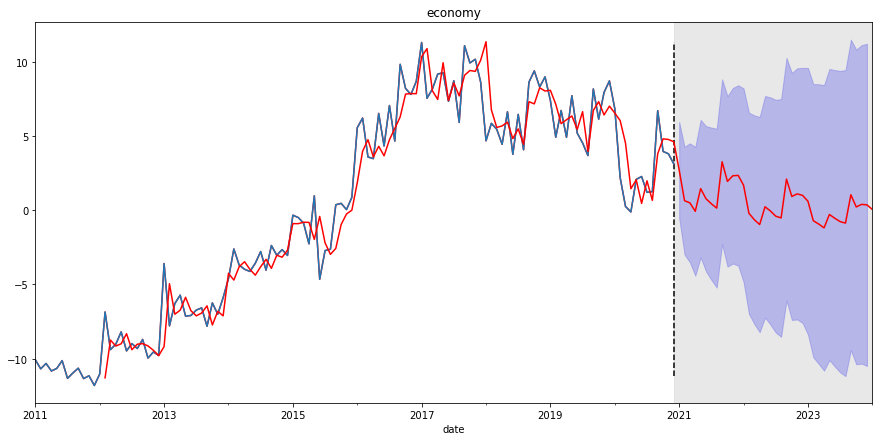

In [59]:
plotSARIMA(pd.DataFrame(scaled_total_df['economy']), best_model, 36)

In [182]:
df_get_result

population,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,-0.297620,0.033237,-0.332068,-0.263171
2021-02-01,-0.343498,0.064666,-0.410520,-0.276475
2021-03-01,-0.390841,0.091181,-0.485344,-0.296338
2021-04-01,-0.437971,0.115385,-0.557561,-0.318382
2021-05-01,-0.484603,0.138532,-0.628182,-0.341024
2021-06-01,-0.530692,0.161226,-0.697791,-0.363592
2021-07-01,-0.576235,0.183780,-0.766711,-0.385760
2021-08-01,-0.621239,0.206368,-0.835126,-0.407352
2021-09-01,-0.665709,0.229091,-0.903146,-0.428271
2021-10-01,-0.709651,0.252008,-0.970841,-0.448461


In [176]:
df_get_result_hp= df_get_result_hp.add_suffix('_hp')
df_get_result_pop = df_get_result_pop.add_suffix('_pop')
df_get_result_fg= df_get_result_fg.add_suffix('_fg') 
df_get_result_now=df_get_result_now.add_suffix('_now')

In [177]:
del total

In [178]:

total=pd.concat([df_get_result_pop,df_get_result_eco,df_get_result_fg,df_forecast_3,df_get_result_now,df_forecast_5,df_get_result_hp,df_forecast_7],axis=1)

In [180]:
total.shape

(36, 32)

In [181]:
total.to_excel('지수데이터@1202.xlsx')

# arima 모델 기준 파라미터 

In [63]:
def index_forecast(series, p,d,q): 
    #p, q, P, Q = result_table.parameters[0]
    s = 0 
    best_model=sm.tsa.statespace.SARIMAX(series, order=(p, d, q), 
                                            seasonal_order=(0, 0, 0, 0)).fit(disp=-1)

    df_get_result = best_model.get_forecast(36).summary_frame(alpha=0.30)
    def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
        """
            Plot time series, its ACF and PACF, calculate Dickey–Fuller test

            y - timeseries
            lags - how many lags to include in ACF, PACF calculation
        """
        if not isinstance(y, pd.Series):
            y = pd.Series(y)

        with plt.style.context(style):    
            fig = plt.figure(figsize=figsize)
            layout = (2, 2)
            ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
            acf_ax = plt.subplot2grid(layout, (1, 0))
            pacf_ax = plt.subplot2grid(layout, (1, 1))

            y.plot(ax=ts_ax)
            p_value = sm.tsa.stattools.adfuller(y)[1]
            ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
            smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
            smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
            plt.tight_layout()

    import statsmodels.tsa.api as smt
    tsplot(best_model.resid[24+1:], lags=45)

    def plotSARIMA(series, model, n_steps):
        """
            Plots model vs predicted values

            series - dataset with timeseries
            model - fitted SARIMA model
            n_steps - number of steps to predict in the future

        """
        # adding model values
        data = series.copy()
        data.columns = ['actual']
        data['arima_model'] = model.fittedvalues
        # making a shift on s+d steps, because these values were unobserved by the model
        # due to the differentiating
        data['arima_model'][:s+d] = np.NaN
        global forecast
        # forecasting on n_steps forward 
        forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
        forecast = data.arima_model.append(forecast)
        # calculate error, again having shifted on s+d steps from the beginning
        error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

        plt.figure(figsize=(15, 7))
        plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
        plt.plot(forecast, color='r', label="model")
        plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
        plt.plot(data.actual, label="actual")
        plt.legend()
        plt.grid(True);

    def mean_absolute_percentage_error(y_true, y_pred): 
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    plotSARIMA(pd.DataFrame(series), best_model, 36)

In [ ]:
# Best model:  ARIMA(2,2,1)(0,0,0)[0] population
# Best model:  ARIMA(1,1,2)(0,0,0)[0] economy
# Best model:  ARIMA(2,0,0)(0,0,0)[0] future_growth
# Best model:  ARIMA(2,2,2)(0,0,0)[0] income
# Best model:  ARIMA(2,0,2)(0,0,0)[0] now
# Best model:  ARIMA(2,1,2)(0,0,0)[0] policy
# Best model:  ARIMA(0,2,1)(0,0,0)[0] home_price
# Best model:  ARIMA(0,1,0)(0,0,0)[0] education

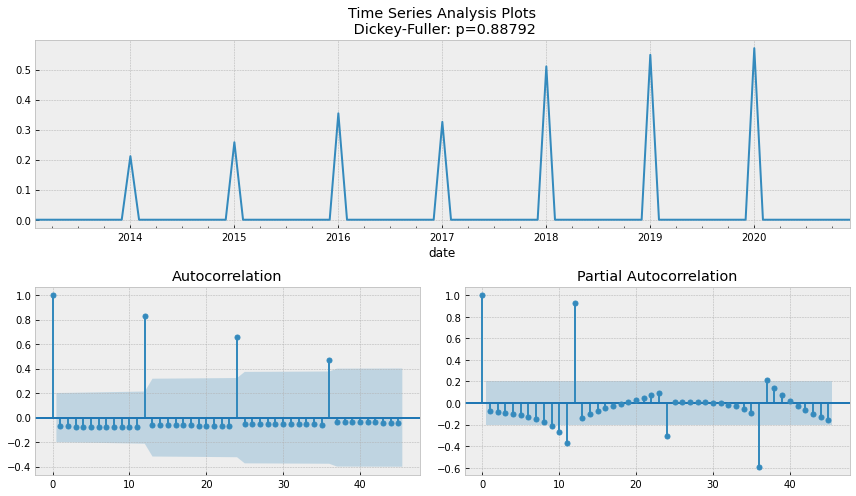

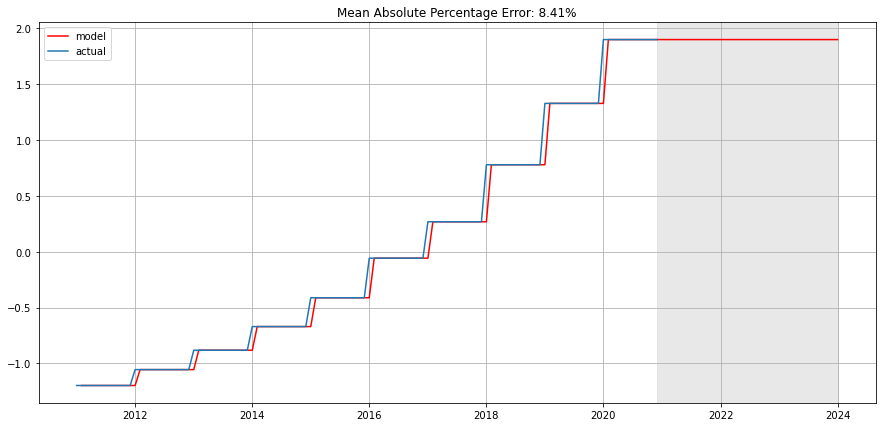

In [69]:
index_forecast(scaled_total_df['policy'],2,1,2)